In [1]:
import torch
import logging 
from utils.mnist_model import UNet
from utils.predict_function import predict_single
from utils.utils import preprocess_mnist, correlation, padding
from skimage import io
from utils.plot import paper_plot_direct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### (1) 加载仿真模型和实验模型

In [2]:
# 仿真模型
# model1_name = "./MNIST_model_PSF.pt"
model1_name = "./model_040.pt"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = UNet(input_channels=1, output_channels=1).to(device)
state_dict = torch.load(model1_name, map_location=device)
model1.load_state_dict(state_dict['model_state_dict'])
model1.eval()
logging.info('Model1 loaded!')

# 实验数据训练模型
# model2_name = "C:/Users/hands/Desktop/prediction/MNIST_model/MNIST_EXPRI_model.pt"
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model2 = UNet(input_channels=1, output_channels=1).to(device)
# state_dict = torch.load(model2_name, map_location=device)
# model2.load_state_dict(state_dict['model_state_dict'])
# model2.eval() 
# logging.info('Model2 loaded!')

### (2) 数据预处理   以及   单次实验数据重建   查看效果

重建图像耗时： 0.29878759384155273


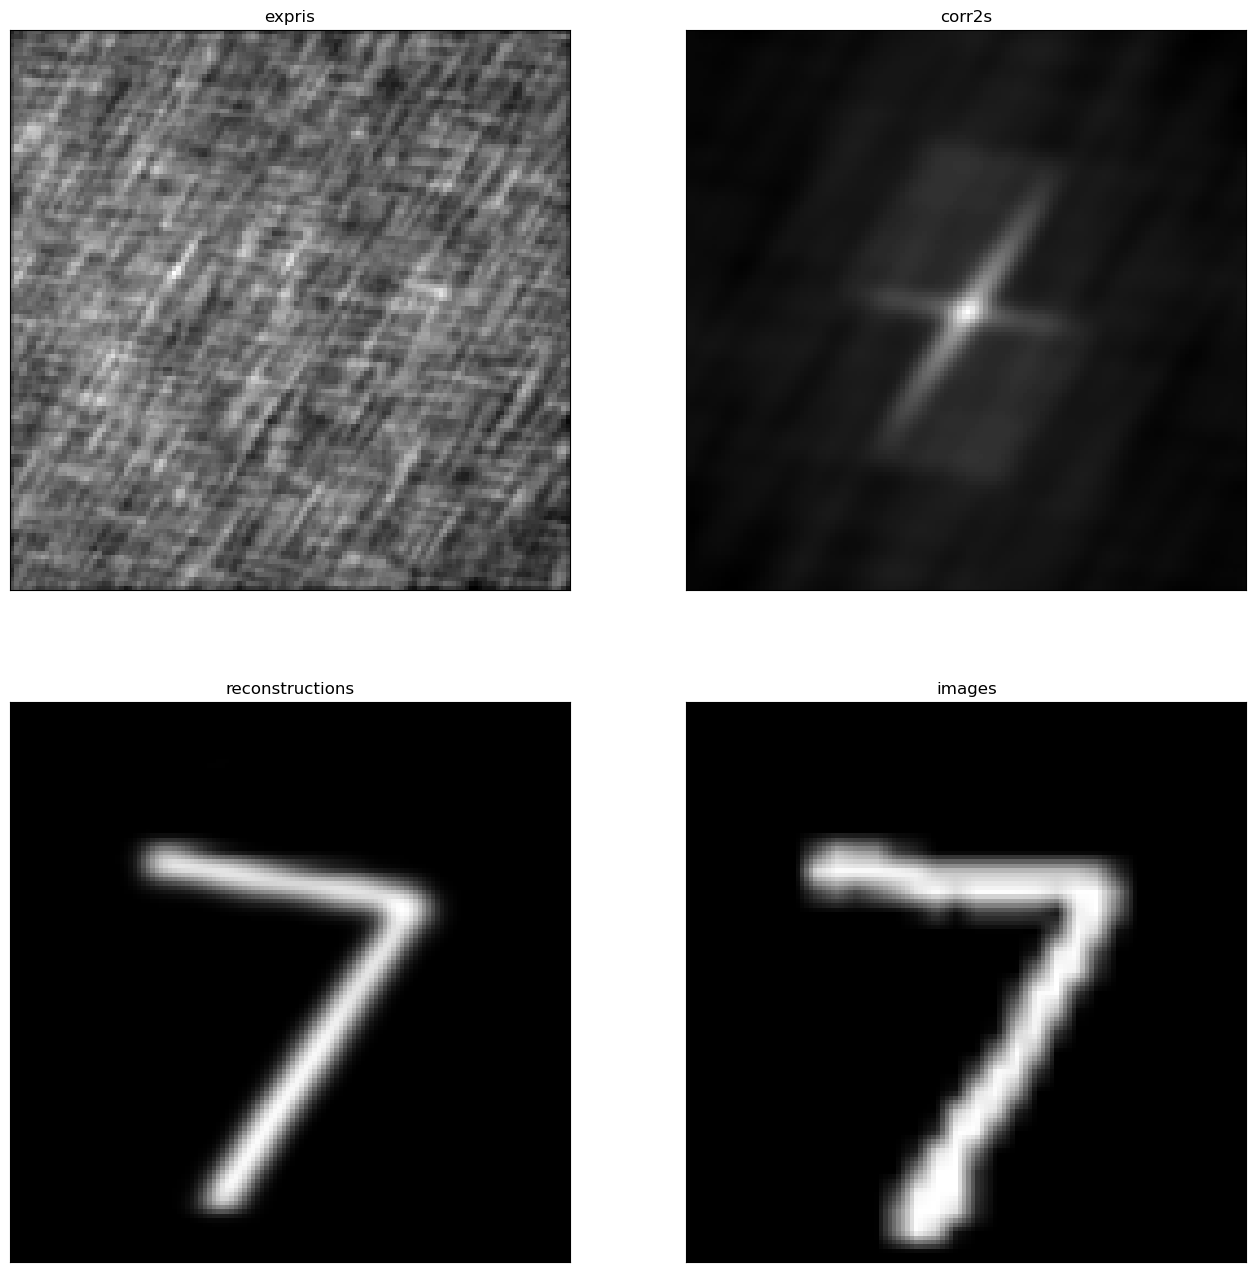

In [8]:
Size1 = 170 # 3x-120-90、 2x-80-60、 1x-40-30 130
# Size2 = 70
# scaler = "2"
name = "1"

read_dir_speckle = "D:/网络训练/test/mnist/speckle1/test/2x/"
# read_dir_speckle = "K:/data_process/spec/"
read_dir_label = "D:/网络训练/test\mnist/test/"
experi_name = read_dir_speckle + name + ".bmp"
label_name = read_dir_label + 'TestImage_' + name + '.bmp'
data_type = torch.float32

label_image = io.imread(label_name)
experiment_image = io.imread(experi_name)
experiment_image = experiment_image.astype(np.float32)
label_image1, corr21, experiment_image1 = preprocess_mnist(label_image, experiment_image, Size1)
# label_image2, corr22, experiment_image2 = preprocess_mnist(label_image, experiment_image, Size2)
image_pred1, _ = predict_single(model1, device, corr21, label_image1, experiment_image1, data_type)
# image_pred2, experiment_image2 = predict_single(model2, device, corr22, label_image2, experiment_image2, data_type)

# save_dir_simulation_rebuild = "../plot/save_images/simulation/" + scaler + "x/"
# save_dir_diffuser1_rebuild = "../plot/save_images/diffuser1/rebuild/" + scaler + "x/"
# save_dir_diffuser1_speckle = "../plot/save_images/diffuser1/speckle/" + scaler + "x/"

# # 仿真模型重建
# paper_plot_direct(image_pred1, save_dir_simulation_rebuild, name, 'png', 128, True)
# # # 实验模型重建
# paper_plot_direct(image_pred2, save_dir_diffuser1_rebuild, name, 'png', 128, True)
# # 散斑图案保存
# paper_plot_direct(experiment_image2, save_dir_diffuser1_speckle, name, 'png', 128, True)